## Language Modeling(언어 모델)
    - 언어 모델은 입력으로 주어진 시퀀스의 다음을 학습하는 과정에서 주어진 시퀀스가 얼마나 자연스러운지를 학습하게 된다. 즉, 언어모델은 "민준이가 껌을 마셨다" 인지 "민준이가 껌을 씹었다"인지를 데이터로부터 학습을 하게 된다. 이렇게 학습을 완료한 언어 모델은 언어의 패턴과 규칙을 학습하여 전반적인 언어의 특징을 파악
    - 지금까지 자연어처리에서 이 언어 모델이 pretrained model이다.

## ELMO(Embedding from Language Models)
     -ELMo의 구조
  
      - 1. character-level CNN
      :입력된 문자들 간의 관계를 파악하고 임베딩 벡터로 변환하는 역할
      ELMO는 character level로 문자를 인식한다.(해당 character의 유니코드 id를 입력받음) 예를들어, 밥이라는 단어를 입력으로 받으면 ㅂ ㅏ ㅂ에 해당되는 유니코드 235,176, 165 세 개의 숫자가 된다. 그 후 각각 입력받은 단어의 시작과 끝에 해당하는 스페셜 토큰 <BOW>와 <EOW>에 해당하는 유니코드를 앞뒤로 붙여준다.
      
      - 2. bidirectional LSTM
      character-level CNN을 통과하여 만들어진 벡터들은 bidrectional LSTM을 통과
      pretrain시에 bidirectional LSTM은 주어진 입력에 다음에 올 단어들을 예측
      bidirectional이라는 것은 양방향으로 학습하는 것을 의미. 주어진 입력을 한번은 순방향으로, 한번은 역방향으로 각각 2개의 LSTM layer를 통과하게 된다.(학습시간은 오래걸리지만 성능이 좋아짐)
      pretrain시, 순방향과 역방향으로 LSTM을 통과한 히든 벡터들은 이후 softmax(소프트 맥스)를 취해 다음 단어를 예측.

## GPT(Generative Pre-Training Transformer)
    - Transformer의 decoder구조만을 이용하여 만든 네트워크
    (트랜스포머의 decoder를 아주 깊게 쌓아 많은 데이터를 학습시켜 성능을 높힌 네트워크
    - GPT의 구조
    1. Embedding
    (GPT는 텍스트의 Embedding으로 BPE(Byte-pair Encoding)을 사용
       BPE: 모든 단어를 문자(바이트)들의 집합으로 취급하여 자주 등장하는 문자쌍을 합치는 subword tokenization. 처음보는 단어일지라도 문자(알파벳)들의 조합으로 나타내어 OOV문제를 해결할 수 있다는 장점.
    2. Masked Multi-Head Attention: 모든 것을 병렬적으로 처리하는 트랜스포머에게 자기 회귀적(Autoregressive)인 특성을 부여하기 위해 만든 장치. 자기회귀적인 것은 훈련 단계에서 디코더에게 정답문장을 매 스텝 단위로 단어 하나씩 알려주고 그 다음 단어를 예측(Next Token Prediction)하게 하는 형태로 학습되는 형태- time-step을 하나하나 거치듯이 만들어줌, 현재 자기보다 미래에 생성될 토큰을 보지 못하도록 masking 처리)

## GPT(Generative Pre-Training Transformer)
    - pretrain이 끝나게 되면 GPT는 downstream task에 맞게 finetuning을 하게 된다.
    두 가지의 문제를 동시에 풀게 된다.

# BERT
    - 구글에서 2018년에 발표한 언어 모델로, Transformer 아키텍처를 기반으로 하고 양방향(Bidirectional)학습을 사용하여 이전의 모델보다 더 좋은 성능을 보이는 모델.
    큰 양의 텍스트 데이터를 사용하여 사전 학습(pre-training)되며, 이후 특정 자연어 처리 작업에 fine-tuning하여 사용이 가능
    
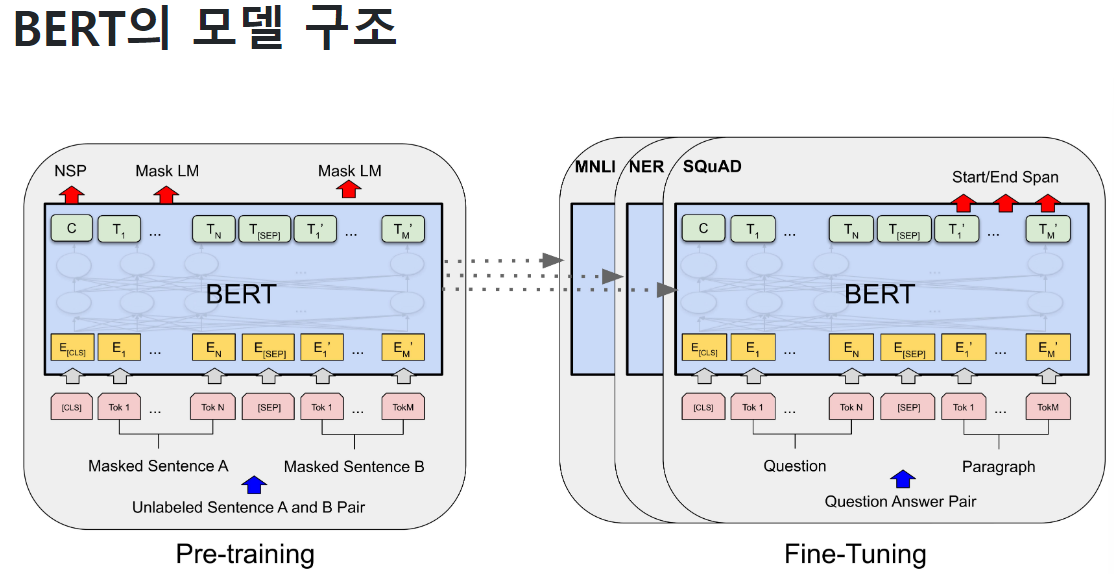

## bert 모델 구조
    -1. Masked Language Model(MLM)
    : 입력 문장에서 랜덤하게 일부 단어를 마스크하고, 해당 단어를 예측하는 것으로 학습하며 이때 3가지 유형의 마스크를 사용하게 된다.MLM 방식으로 문장의 문맥을 이해하며 단어의 의미를 파악하는 능력을 학습
    
    마스킹방법:
    1. 전체 토큰 중 15%를 랜덤하게 선택. 그 후 15%중에서도 3가지 유형으로 마스킹을 진행.
    첫번째 유형: 입력 문장에서 랜덤하게 일부 단어를 마스크하는 경우, 이 유형의 확률은 80%
    두번째 유형: 일부 단어를 마스크하는 대신 랜덤하게 다른 단어로 대체하는 경우, 이 유형의 확률은 10%이다.
    세번째 유형: 마스크하지 않고 그대로 둔 단어를 임의의 확률로 마스크하는 경우의 유형 확률은 10%이다.
    -2. Next Sentence Prediction(NSP)
    : 두 문장이 주어졌을 때, 두 번째 문장이 첫 번째 문장의 다음 문장인지 아닌지를 예측하는 것으로 학습.이를 통해 모델은 문장과 문맥의 의미를 파악하는 능력을 배우게 된다. 이때 문장의 유형은 2가지이며 50%의 확률로 결정된다.
    
    첫 번째 유형: 첫 번째 문장과 두 번째 문장은 원본 문장의 이어지는 문장
    두 번째 유형: 첫 번째 문장과 두 번째 문장은 원본 문장에서 이어지지 않는 관계문장이다.

## BERT 단일 문장 분류
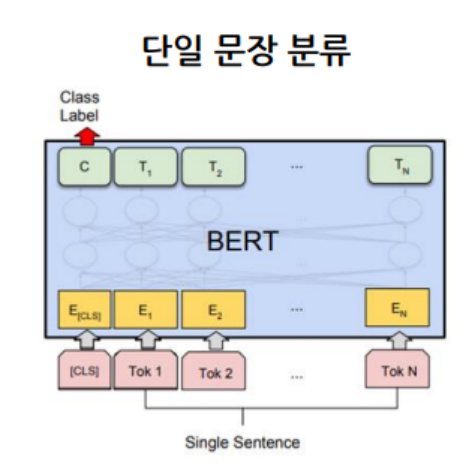
    
    - 입력으로 1개의 문장을 넣는다. 이때 최종 [CIS]token 위에 classification layer을 추가함으로써 최종적으로 나온 [CLS] token을 통과시켜 분류 문제를 해결(감성 분석)

## BERT 두 문장 관계 분류
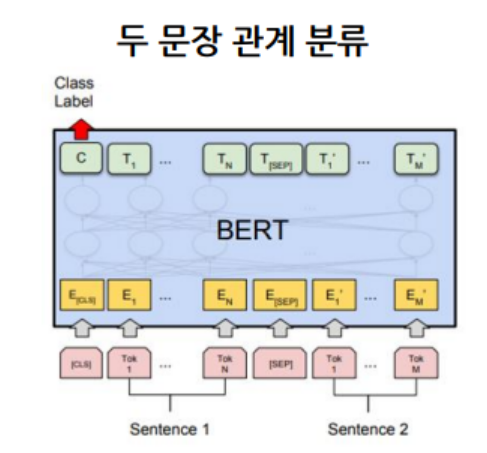

    - 입력으로 2개의 문장을 [SEP] token 기준으로 입력을 넣는다. 이때 [SEP] token은 서로 다른 문장임을 명시시켜주는 token이다. 2개의 문장의 경우 Embedding Layer의 Sentence Embedding의 입력이 서로 다르게 들어가게 된다.
    [CLS] token 위에 Classification layer을 추가함으로써 최종적으로 나온 [CLS]token을 통고